# Random Forests 🌲🌳

## Core Concept
An **ensemble method** that combines multiple decision trees to make more robust predictions. Uses **bagging** (bootstrap aggregating) and **random feature selection** to reduce variance and overfitting.

> *"The wisdom of crowds applied to machine learning"*

---

## Mathematical Foundation

### Bootstrap Sampling
For dataset $D$ with $n$ samples, create $B$ bootstrap samples:
$$D_b = \{(x_{i_1}, y_{i_1}), (x_{i_2}, y_{i_2}), \ldots, (x_{i_n}, y_{i_n})\}$$
where each $i_j$ is sampled uniformly with replacement from $\{1, 2, \ldots, n\}$

### Random Feature Selection
At each node split, select $m$ features randomly from total $p$ features:
- **Classification**: $m = \sqrt{p}$
- **Regression**: $m = \frac{p}{3}$
- **General**: $m \in \{1, 2, \ldots, p\}$

### Final Prediction
**Classification** (majority voting):
$$\hat{y} = \text{mode}\{h_1(x), h_2(x), \ldots, h_B(x)\}$$

**Regression** (averaging):
$$\hat{y} = \frac{1}{B}\sum_{b=1}^{B} h_b(x)$$

where $h_b(x)$ is the prediction from tree $b$

---

## Algorithm Steps

1. **📊 Bootstrap Sampling**: Create $B$ datasets by sampling with replacement from original data ($D \rightarrow D_1, D_2, \ldots, D_B$)

2. **🎯 Random Feature Selection**: At each split, consider only $m$ randomly selected features from $p$ total features

3. **🌱 Build Trees**: Train a decision tree $h_b$ on each bootstrap sample $D_b$ using random feature subsets

4. **🗳️ Aggregate Predictions**: 
   - Classification: Majority vote
   - Regression: Average predictions

---

## Key Hyperparameters

| Parameter | Symbol | Description | Typical Values |
|-----------|--------|-------------|----------------|
| **n_estimators** | $B$ | Number of trees | 100-1000 |
| **max_features** | $m$ | Features per split | $\sqrt{p}$, $\log_2(p)$, $p/3$ |
| **max_depth** | $d$ | Maximum tree depth | 3-20, None |
| **min_samples_split** | $s$ | Min samples to split | 2-10 |
| **min_samples_leaf** | $l$ | Min samples in leaf | 1-5 |
| **bootstrap** | - | Use bootstrap sampling | True/False |

---

## Bias-Variance Decomposition

Random Forests reduce **variance** without significantly increasing **bias**:

$$\text{Error} = \text{Bias}^2 + \text{Variance} + \text{Irreducible Error}$$

- **Individual trees**: High variance, low bias
- **Random Forest**: Lower variance, similar bias
- **Trade-off**: Slight increase in bias for significant variance reduction

---

## Out-of-Bag (OOB) Error

Each bootstrap sample excludes ~37% of original data:
$$P(\text{sample not selected}) = \left(1 - \frac{1}{n}\right)^n \approx \frac{1}{e} \approx 0.368$$

**OOB Error Estimation**:
$$\text{OOB Error} = \frac{1}{n}\sum_{i=1}^{n} L(y_i, \hat{y}_i^{\text{OOB}})$$
where $\hat{y}_i^{\text{OOB}}$ uses only trees that didn't see sample $i$

---

## Feature Importance

### Gini Importance (Mean Decrease Impurity)
For feature $j$:
$$\text{Importance}_j = \frac{1}{B}\sum_{b=1}^{B}\sum_{t \in T_b} p(t) \cdot \Delta_{\text{impurity}}(t, j)$$

where:
- $T_b$ = nodes in tree $b$ that split on feature $j$
- $p(t)$ = fraction of samples reaching node $t$
- $\Delta_{\text{impurity}}(t, j)$ = impurity decrease from splitting on $j$

### Permutation Importance
$$\text{Importance}_j = \text{Score}_{\text{original}} - \text{Score}_{\text{permuted}_j}$$

---

## ✅ Advantages

- **🎯 Reduces Overfitting**: Averaging multiple trees reduces variance
- **🔧 Handles Mixed Data**: Works with numerical and categorical features
- **📊 Feature Selection**: Built-in feature importance ranking
- **🛡️ Robust to Outliers**: Tree-based splits are less sensitive to extreme values
- **🔄 Handles Missing Values**: Can impute or use surrogate splits
- **⚡ Parallelizable**: Trees can be trained independently
- **📈 Good Default Performance**: Often works well with minimal tuning

---

## ❌ Disadvantages

- **🔍 Less Interpretable**: Harder to understand than single trees
- **💾 Memory Intensive**: Stores multiple trees
- **⚖️ Biased Toward Categorical**: Favors features with more categories
- **📊 Can Overfit**: With very noisy data or too many trees
- **🎯 Prediction Limitations**: Cannot extrapolate beyond training range
- **⏱️ Slower Inference**: Must query multiple trees

---

## 🎯 When to Use Random Forests

### ✅ Good For:
- Medium to large datasets (n > 1000)
- Mixed data types (numerical + categorical)
- Feature selection and importance ranking
- Baseline model (good out-of-the-box performance)
- When some overfitting protection is needed

### ❌ Avoid When:
- Small datasets (n < 100)
- High interpretability required
- Real-time prediction with strict latency requirements
- Linear relationships dominate the problem

---

## Variants & Extensions

- **Extra Trees (Extremely Randomized Trees)**: Random thresholds for splits
- **Balanced Random Forest**: Handles class imbalance
- **Random Forest Regressor/Classifier**: Task-specific implementations
- **Isolation Forest**: Anomaly detection using random forests

---

## Quick Implementation Tips

```python
# Typical hyperparameter ranges for tuning
n_estimators: [100, 200, 500, 1000]
max_features: ['sqrt', 'log2', None]
max_depth: [3, 5, 10, 20, None]
min_samples_split: [2, 5, 10]
```

**Rule of Thumb**: Start with defaults, then tune `n_estimators` and `max_features` first!

Why is random forests called that? 

A) Forests - Collection of Trees

   Random - Bagging with decision trees as the base models 

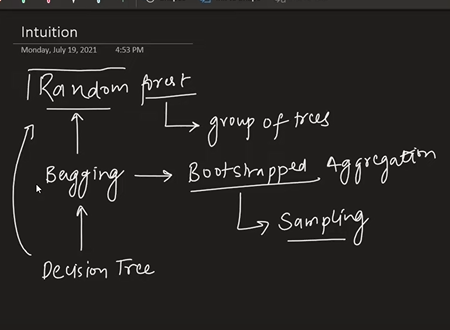

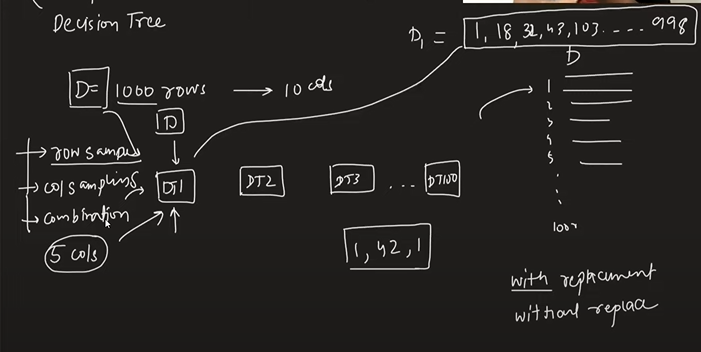

Gives subset of data to each tree

### 🧪 Sampling With vs Without Replacement in Random Forests

In **Random Forests**, **sampling *with* replacement** (a.k.a. **bootstrap sampling**) is **standard** and generally **yields better results** than sampling **without** replacement.

---

### 🔍 Key Differences

| Aspect                         | Sampling **With Replacement** | Sampling **Without Replacement** |
|-------------------------------|-------------------------------|----------------------------------|
| Also called                   | Bootstrap sampling            | Subsampling                      |
| Default in Random Forest?     | ✅ Yes                        | ❌ No                            |
| Model diversity               | **High** (trees are uncorrelated) | Lower (trees are more similar) |
| Overfitting risk              | Lower                         | Higher                          |
| Bias                          | Slightly higher               | Slightly lower                  |
| Variance                      | Lower (better generalization) | Higher                          |

---

### 🧠 Why Sampling *With* Replacement Works Better

1. **Tree Diversity:**
   - Each decision tree gets a slightly different training set.
   - Leads to **uncorrelated trees**, which is essential for variance reduction when averaging predictions.

2. **Reduces Overfitting:**
   - Trees overfit differently, and their ensemble smooths out individual errors.

3. **Out-of-Bag (OOB) Estimation:**
   - Only possible when using bootstrap samples.
   - About **1/3rd** of the data is not seen by a tree → acts as a **built-in validation set**.

---

### 🧪 Empirical Observation

Most real-world results show that:

> **Random Forests with sampling *with* replacement** consistently perform **better** than without, due to better generalization.

However, in **small datasets**, sampling **without** replacement might sometimes help by ensuring all data points are used more evenly.

---

### ✅ Summary

> **Sampling with replacement** is preferred in Random Forests. It increases diversity, reduces variance, and supports OOB validation — all of which contribute to **better generalization performance**.


In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.659648,-3.119735,2.813441,1.033367,-2.392156,1
1,-0.382249,-0.084630,-0.007067,-0.253878,-0.253896,1
2,0.884844,-1.403363,-1.845145,-1.544094,3.764121,0
3,2.000072,-2.362356,0.627293,0.684844,0.775097,1
4,0.001923,-2.420857,-1.201910,0.800122,1.291587,1


In [4]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [5]:
# function for feature sampling
import random

def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols]
  new_df['target'] = df['target']
  return new_df

In [6]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [7]:
df1 = combined_sampling(df,0.5,0.5)

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_29560\2155301970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [8]:
df2 = combined_sampling(df,0.5,0.5)

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_29560\2155301970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [9]:
df3 = combined_sampling(df,0.5,0.5)

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_29560\2155301970.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['target'] = df['target']


In [10]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col5', 'col1', 'target'], dtype='object')
Index(['col2', 'col1', 'target'], dtype='object')
Index(['col1', 'col3', 'target'], dtype='object')


In [11]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [12]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

DecisionTreeClassifier()

In [13]:
from sklearn.tree import plot_tree

[Text(0.5277777777777778, 0.9285714285714286, 'x[0] <= 0.8\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.3333333333333333, 0.7857142857142857, 'x[1] <= 2.701\ngini = 0.358\nsamples = 30\nvalue = [7, 23]'),
 Text(0.4305555555555556, 0.8571428571428572, 'True  '),
 Text(0.2777777777777778, 0.6428571428571429, 'x[1] <= 1.524\ngini = 0.293\nsamples = 28\nvalue = [5, 23]'),
 Text(0.1111111111111111, 0.5, 'x[1] <= 1.196\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(0.05555555555555555, 0.35714285714285715, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.16666666666666666, 0.35714285714285715, 'x[0] <= 0.333\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1111111111111111, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.2222222222222222, 0.21428571428571427, 'x[0] <= 0.463\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.07142857142857142, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.2777777777777778, 0.071428571

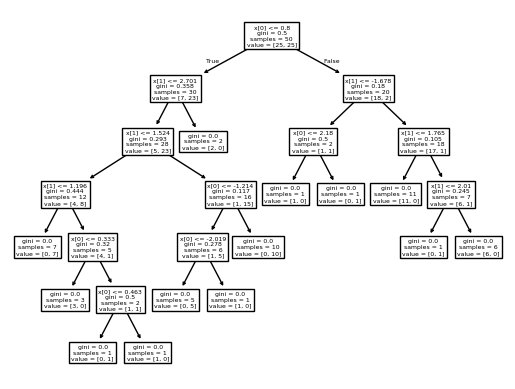

In [14]:
plot_tree(clf1)

[Text(0.3333333333333333, 0.9583333333333334, 'x[0] <= 0.82\ngini = 0.499\nsamples = 50\nvalue = [26, 24]'),
 Text(0.2222222222222222, 0.875, 'x[1] <= 0.076\ngini = 0.465\nsamples = 38\nvalue = [14, 24]'),
 Text(0.2777777777777778, 0.9166666666666667, 'True  '),
 Text(0.1111111111111111, 0.7916666666666666, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.3333333333333333, 0.7916666666666666, 'x[1] <= 0.656\ngini = 0.492\nsamples = 32\nvalue = [14, 18]'),
 Text(0.2222222222222222, 0.7083333333333334, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.4444444444444444, 0.7083333333333334, 'x[1] <= 3.064\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(0.3333333333333333, 0.625, 'x[1] <= 1.645\ngini = 0.426\nsamples = 26\nvalue = [8, 18]'),
 Text(0.2222222222222222, 0.5416666666666666, 'x[1] <= 1.274\ngini = 0.5\nsamples = 16\nvalue = [8, 8]'),
 Text(0.1111111111111111, 0.4583333333333333, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.3333333333333333, 0.4583333333333333,

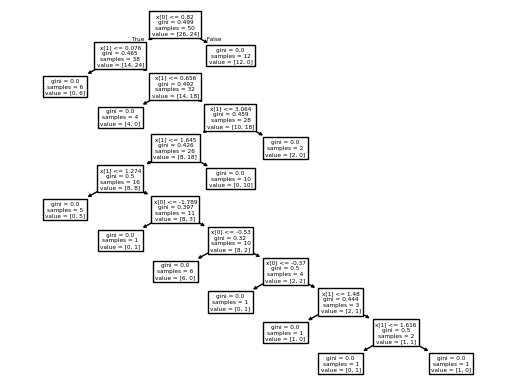

In [15]:
plot_tree(clf2)

[Text(0.5, 0.9375, 'x[1] <= -0.808\ngini = 0.487\nsamples = 50\nvalue = [21.0, 29.0]'),
 Text(0.4166666666666667, 0.8125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.45833333333333337, 0.875, 'True  '),
 Text(0.5833333333333334, 0.8125, 'x[0] <= 2.669\ngini = 0.427\nsamples = 42\nvalue = [13, 29]'),
 Text(0.5416666666666667, 0.875, '  False'),
 Text(0.5, 0.6875, 'x[0] <= 0.41\ngini = 0.361\nsamples = 38\nvalue = [9, 29]'),
 Text(0.16666666666666666, 0.5625, 'x[1] <= -0.008\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.08333333333333333, 0.4375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.25, 0.4375, 'x[1] <= 0.386\ngini = 0.469\nsamples = 8\nvalue = [3, 5]'),
 Text(0.16666666666666666, 0.3125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.3333333333333333, 0.3125, 'x[1] <= 1.462\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.25, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.4166666666666667, 0.1875, 'gini = 0.0\nsamples = 1\nvalue = [

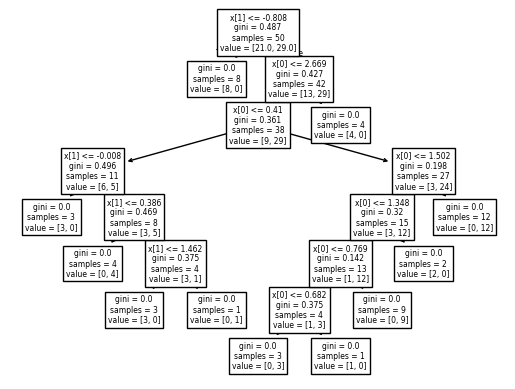

In [16]:
plot_tree(clf3)

In [17]:
clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [18]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:
clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\SYED NAVEED\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [20]:
df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
84,2.204841,-1.690896,1.798903,3.274880,-2.678182,1
57,1.009061,0.921230,-2.198372,-0.357699,1.250143,0
74,1.868912,-1.801507,1.316491,1.264924,-0.544060,1
60,0.386951,1.422590,1.212079,-2.784052,2.450417,0
51,1.874982,1.544033,-2.225065,0.245559,0.972208,0
53,0.093837,-1.715660,0.159370,-0.470535,1.075348,1
54,1.191725,-0.433949,0.979454,1.592695,-0.545588,1
10,1.200898,3.646003,-2.175377,1.361437,-2.494914,0
42,1.127148,-0.434820,1.196781,1.338260,-1.254675,1
94,1.856985,-1.568786,-0.691264,2.613200,1.849934,1
